# Perceptron Lab

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os, sys
from google.colab import files
from random import *

In [0]:
try:
  import progressbar
  
except ImportError:
  !pip3 install -q progressbar2
  import progressbar
  
  

In [3]:
# get access to drive from colab
''' 
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
!mkdir -p drive
!google-drive-ocamlfuse drive
'''

' \n!apt-get install -y -qq software-properties-common python-software-properties module-init-tools\n!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null\n!apt-get update -qq 2>&1 > /dev/null\n!apt-get -y install -qq google-drive-ocamlfuse fuse\n\nfrom google.colab import auth\nauth.authenticate_user()\nfrom oauth2client.client import GoogleCredentials\ncreds = GoogleCredentials.get_application_default()\nimport getpass\n\n!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL\nvcode = getpass.getpass()\n!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}\n!mkdir -p drive\n!google-drive-ocamlfuse drive\n'

In [4]:
print(os.getcwd()) # prints dir
print(os.listdir()) # prints files in location

/content
['sample_data', '.config']


In [5]:
os.chdir('drive/College Files/2018 Fall School Year FAU/DeepLearningFall2018/ClassWork')
print(os.listdir())

FileNotFoundError: ignored

In [6]:
uploaded = files.upload()

Saving linear_data.csv to linear_data.csv


In [7]:
# load in data
data = np.genfromtxt('linear_data.csv', delimiter=',')
print(data.shape)

(1000, 3)


In [8]:
labels = data[:,-1]
print (labels.shape)

(1000,)


In [9]:
data = data[:, :2]
print(data.shape)

(1000, 2)


In [10]:
positive_x = data[labels == 1, 0]
positive_y = data[labels == 1, 1]

In [0]:
negative_x = data[labels == 0, 0]
negative_y = data[labels == 0, 1]

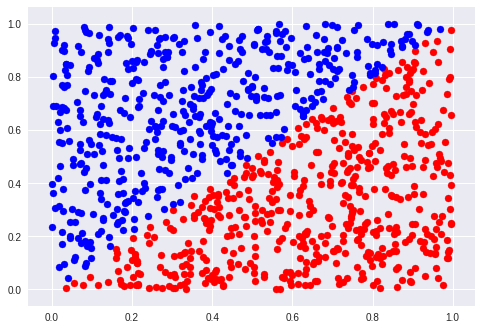

In [16]:
plt.scatter(positive_x, positive_y, c='r')
plt.scatter(negative_x, negative_y, c='b')
plt.show()


In [0]:
biases = np.ones([data.shape[0],1]) # init bias unit
data_with_bias = np.concatenate((data, biases), 1) # concat data with bias

In [29]:
weights_with_bias = np.random.randn(3, ) * 0.01 # for if we wanted a weight for out bias unit
weights = np.random.randn(2, ) * 0.01 # weights w/o bias unit
print('Weights without bias: ', weights)
print('Weights with bias:    ', weights_with_bias)

Weights without bias:  [0.0008119  0.00423698]
Weights with bias:     [ 0.00335541 -0.00628338  0.013512  ]


In [0]:
lr = 0.05
errors = []
errors_with_bias = []

In [0]:
# training loop wihtout bias
for i in range(data.shape[0]):
  x = data[i, :]
  y = labels[i]
  
  #forward pass
  out = np.dot(x, weights)
  out = np.round(out)
  
  #back prop
  error = y - out
  errors.append(error)
  
  weights += lr * (error * x)
    

# training loop with bias:
for i in range(data_with_bias.shape[0]):
  x = data_with_bias[i, :]
  y = labels[i]
  
  #forward pass
  out = np.dot(x, weights_with_bias)
  out = np.round(out)
  
  #back prop
  error = y - out
  errors_with_bias.append(error)
  
  weights_with_bias += lr * (error * x)

In [36]:
print('Weights without bias: ', weights)
print('Weights with bias:    ', weights_with_bias)

Weights without bias:  [ 1.4250749 -0.6594661]
Weights with bias:     [ 0.31835626 -0.35615747  0.513512  ]


In [0]:
all_out = np.round(np.matmul(data,weights))
all_out_with_bias = np.round(np.matmul(data_with_bias,weights_with_bias))

In [40]:
correct = (all_out == labels)
correct_with_bias = (all_out_with_bias == labels)
print('Accuracy without bias: ', np.mean(correct))
print('Accuracy with bias:    ', np.mean(correct_with_bias))

Accuracy without bias:  0.824
Accuracy with bias:     0.966
